<a href="https://colab.research.google.com/github/ankitg-02/sales_analysis/blob/main/corporate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score


In [2]:
#importing data from excelsheet
corporate_sales=pd.read_excel("/content/Sample-sales-data-excel.xls")
data=pd.DataFrame(corporate_sales)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
corporate_mod=data.groupby('Segment')
corporate_data=corporate_mod.get_group('Corporate')
corporate_data.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2620,2621,CA-2017-115931,2017-12-22,2017-12-26,Standard Class,JM-15655,Jim Mitchum,Corporate,United States,Carlsbad,...,88220,West,OFF-ST-10000876,Office Supplies,Storage,Eldon Simplefile Box Office,37.320,3,0.0,10.4496
8183,8184,CA-2017-155642,2017-05-18,2017-05-22,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Chicago,...,60653,Central,FUR-FU-10001918,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder Wi...,1.892,1,0.6,-0.9933
7628,7629,US-2015-159499,2015-11-21,2015-11-23,Second Class,EM-14095,Eudokia Martin,Corporate,United States,Phoenix,...,85023,West,OFF-LA-10003121,Office Supplies,Labels,Avery 506,16.520,5,0.2,5.3690
2661,2662,CA-2017-123372,2017-11-28,2017-12-02,Standard Class,DG-13300,Deirdre Greer,Corporate,United States,New York City,...,10035,East,OFF-EN-10003055,Office Supplies,Envelopes,Blue String-Tie & Button Interoffice Envelopes...,79.960,2,0.0,35.9820
8297,8298,US-2015-158911,2015-07-05,2015-07-11,Standard Class,RS-19765,Roland Schwarz,Corporate,United States,Charlotte,...,28205,South,FUR-FU-10003829,Furniture,Furnishings,Stackable Trays,4.928,2,0.2,0.7392


In [4]:
corporate_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3020 entries, 2 to 9988
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         3020 non-null   int64         
 1   Order ID       3020 non-null   object        
 2   Order Date     3020 non-null   datetime64[ns]
 3   Ship Date      3020 non-null   datetime64[ns]
 4   Ship Mode      3020 non-null   object        
 5   Customer ID    3020 non-null   object        
 6   Customer Name  3020 non-null   object        
 7   Segment        3020 non-null   object        
 8   Country        3020 non-null   object        
 9   City           3020 non-null   object        
 10  State          3020 non-null   object        
 11  Postal Code    3020 non-null   int64         
 12  Region         3020 non-null   object        
 13  Product ID     3020 non-null   object        
 14  Category       3020 non-null   object        
 15  Sub-Category   3020 non-nu

In [5]:
for i in corporate_data.columns:
  print(i,':','\t',corporate_data[i].isnull().sum())

Row ID : 	 0
Order ID : 	 0
Order Date : 	 0
Ship Date : 	 0
Ship Mode : 	 0
Customer ID : 	 0
Customer Name : 	 0
Segment : 	 0
Country : 	 0
City : 	 0
State : 	 0
Postal Code : 	 0
Region : 	 0
Product ID : 	 0
Category : 	 0
Sub-Category : 	 0
Product Name : 	 0
Sales : 	 0
Quantity : 	 0
Discount : 	 0
Profit : 	 0


In [6]:
for i in corporate_data.columns:
  print(i,':','\n',corporate_data[i].unique())

Row ID : 
 [   3   22   23 ... 9967 9988 9989]
Order ID : 
 ['CA-2016-138688' 'CA-2016-137330' 'CA-2016-117590' ... 'CA-2015-141593'
 'CA-2016-146374' 'CA-2017-163629']
Order Date : 
 <DatetimeArray>
['2016-06-12 00:00:00', '2016-12-09 00:00:00', '2016-12-08 00:00:00',
 '2017-09-10 00:00:00', '2016-07-17 00:00:00', '2017-09-19 00:00:00',
 '2016-03-11 00:00:00', '2016-12-11 00:00:00', '2014-12-05 00:00:00',
 '2017-12-09 00:00:00',
 ...
 '2014-06-10 00:00:00', '2014-08-20 00:00:00', '2017-03-16 00:00:00',
 '2014-02-14 00:00:00', '2015-06-08 00:00:00', '2016-05-02 00:00:00',
 '2014-04-03 00:00:00', '2015-09-13 00:00:00', '2016-06-03 00:00:00',
 '2014-03-02 00:00:00']
Length: 830, dtype: datetime64[ns]
Ship Date : 
 <DatetimeArray>
['2016-06-16 00:00:00', '2016-12-13 00:00:00', '2016-12-10 00:00:00',
 '2017-09-15 00:00:00', '2016-07-22 00:00:00', '2017-09-23 00:00:00',
 '2016-03-13 00:00:00', '2016-12-17 00:00:00', '2014-12-10 00:00:00',
 '2017-12-11 00:00:00',
 ...
 '2017-03-21 00:00:00',

In [7]:
corporate_data.describe(include="all")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,3020.000000,3020,3020,3020,3020,3020,3020,3020,3020,3020,...,3020.000000,3020,3020,3020,3020,3020,3020.000000,3020.000000,3020.000000,3020.000000
unique,NaN,1514,NaN,NaN,4,236,236,1,1,340,...,NaN,4,1456,3,17,1444,NaN,NaN,NaN,NaN
top,NaN,CA-2017-157987,NaN,NaN,Standard Class,JD-15895,Jonathan Doherty,Corporate,United States,New York City,...,NaN,West,FUR-CH-10002880,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN
freq,NaN,12,NaN,NaN,1812,32,32,3020,3020,266,...,NaN,960,8,1820,473,18,NaN,NaN,NaN,NaN
mean,5134.017881,NaN,2016-04-27 17:31:52.052980224,2016-05-01 17:42:50.066225152,NaN,NaN,NaN,NaN,NaN,NaN,...,54482.228477,NaN,NaN,NaN,NaN,NaN,233.823300,3.843709,0.158228,30.456667
min,3.000000,NaN,2014-01-06 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1453.000000,NaN,NaN,NaN,NaN,NaN,0.556000,1.000000,0.000000,-3839.990400
25%,2584.000000,NaN,2015-05-03 12:00:00,2015-05-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,22153.000000,NaN,NaN,NaN,NaN,NaN,17.469000,2.000000,0.000000,1.928400
50%,5340.500000,NaN,2016-07-02 00:00:00,2016-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,53209.000000,NaN,NaN,NaN,NaN,NaN,56.540000,3.000000,0.200000,8.694000
75%,7646.500000,NaN,2017-05-13 00:00:00,2017-05-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90004.000000,NaN,NaN,NaN,NaN,NaN,212.895000,5.000000,0.200000,29.843500
max,9989.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99207.000000,NaN,NaN,NaN,NaN,NaN,17499.950000,14.000000,0.800000,8399.976000


**Details about Corporate category**

In [8]:
corporate_data['Category'].value_counts()

,count
Category,
Office Supplies,1820
Furniture,646
Technology,554


**Exploratory Data Analysis**

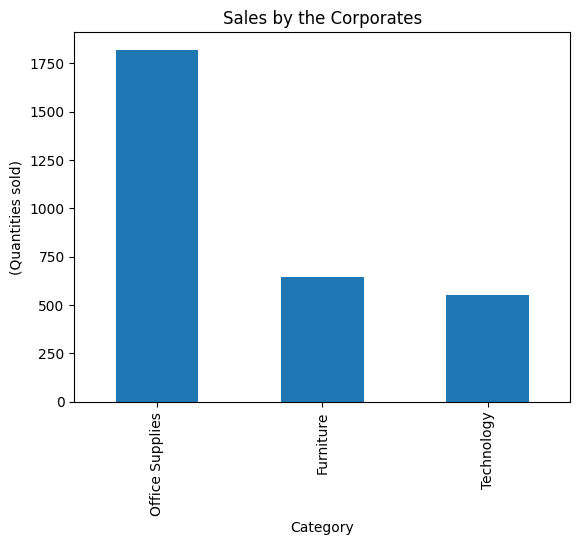

In [9]:
#sales of category items under Corporate segment
plt.xlabel("(Category)")
plt.ylabel("(Quantities sold)")
corporate_data['Category'].value_counts().plot(kind='bar')
plt.title("Sales by the Corporates")
plt.show()

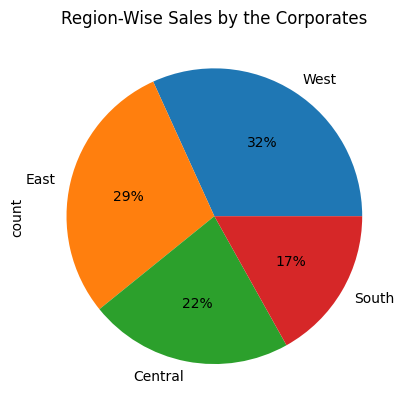

In [10]:
#distirbution of sales pattern about the region by the Corporate category
corporate_data['Region'].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.title("Region-Wise Sales by the Corporates")
plt.show()

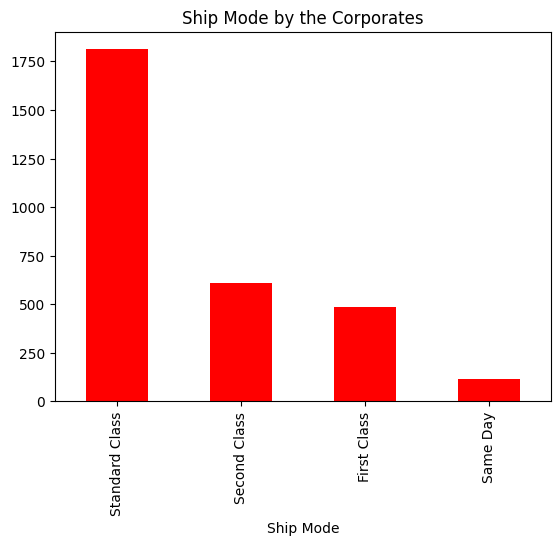

In [11]:
#Shipping mode of items ordered by Corporate segment
corporate_data['Ship Mode'].value_counts().plot(kind='bar',color='red')
plt.title("Ship Mode by the Corporates")
plt.show()

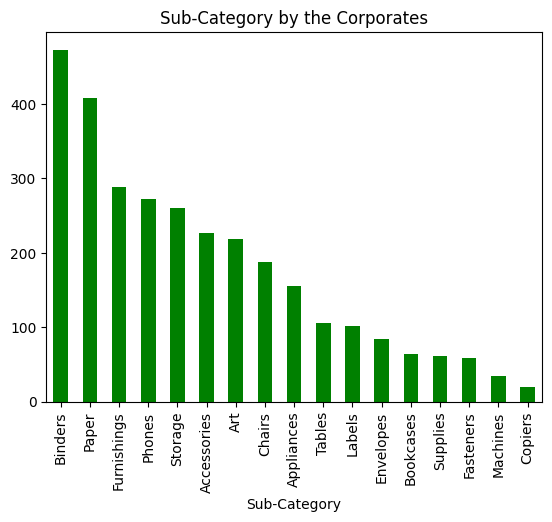

In [12]:
#sub-category items ordered by the Corporate segment
corporate_data['Sub-Category'].value_counts().plot(kind='bar',color='green')
plt.title("Sub-Category by the Corporates")
plt.show()

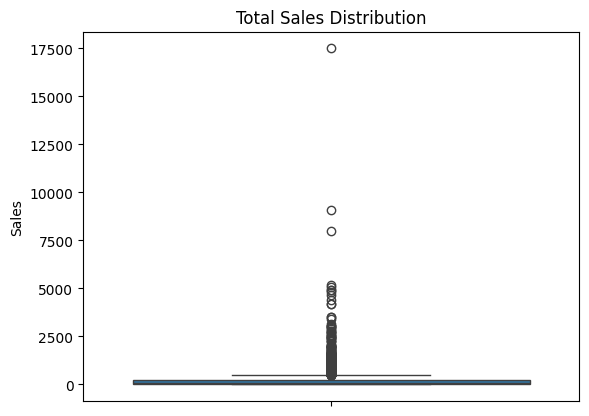

In [13]:
#sales pattern distribution
sns.boxplot(corporate_data['Sales'])
plt.title("Total Sales Distribution")
plt.show()

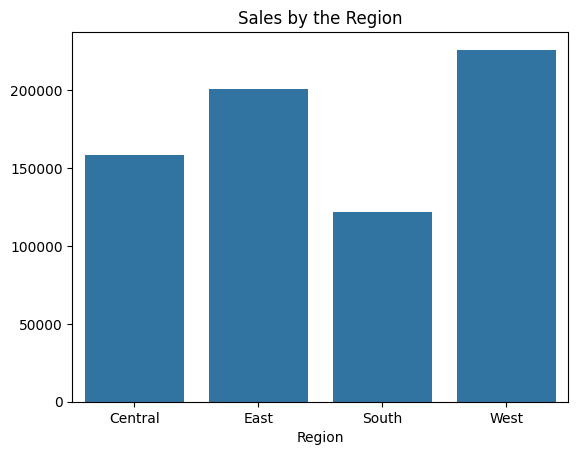

In [14]:
#sales distribution pattern region-wise
sales_region=corporate_data.groupby('Region')['Sales'].sum()
sns.barplot(x=sales_region.index,y=sales_region.values)
plt.title("Sales by the Region")
plt.show()

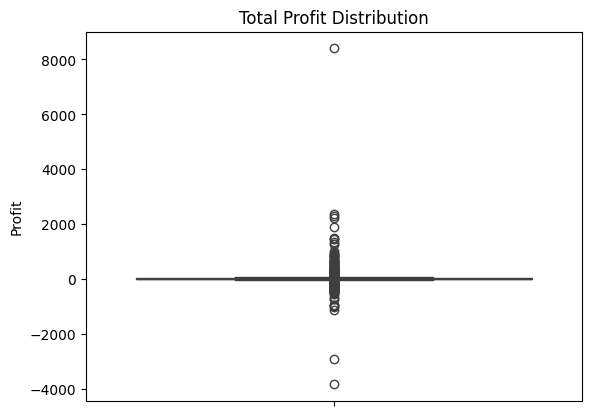

In [15]:
#profit pattern distribution
sns.boxplot(corporate_data['Profit'])
plt.title("Total Profit Distribution")
plt.show()

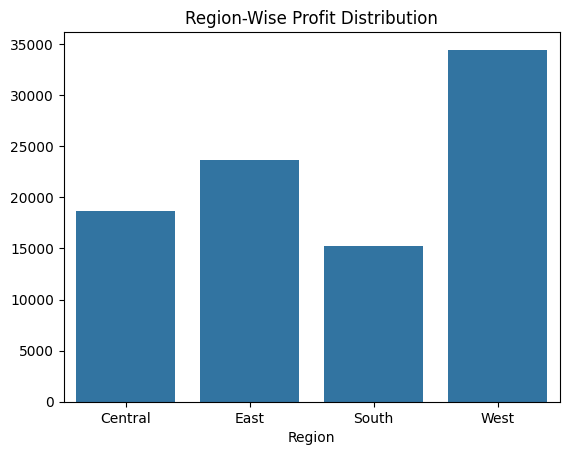

In [16]:
#profit pattern distribution
profit_by_region=corporate_data.groupby('Region')['Profit'].sum()
sns.barplot(y=profit_by_region.values,x=profit_by_region.index)
plt.title("Region-Wise Profit Distribution")
plt.show()

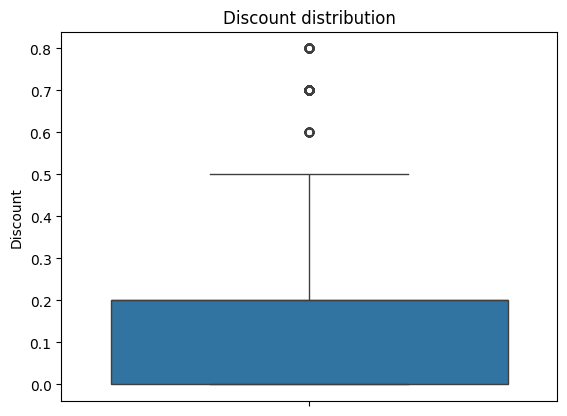

In [17]:
#discount pattern distribution
sns.boxplot(corporate_data['Discount'])
plt.title("Discount distribution")
plt.show()

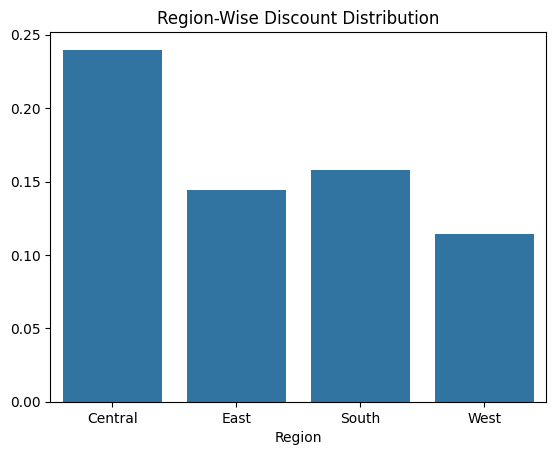

In [18]:
#discount pattern distribution
discount_by_region=corporate_data.groupby('Region')['Discount'].mean()
sns.barplot(y=discount_by_region.values,x=discount_by_region.index)
plt.title("Region-Wise Discount Distribution")
plt.show()

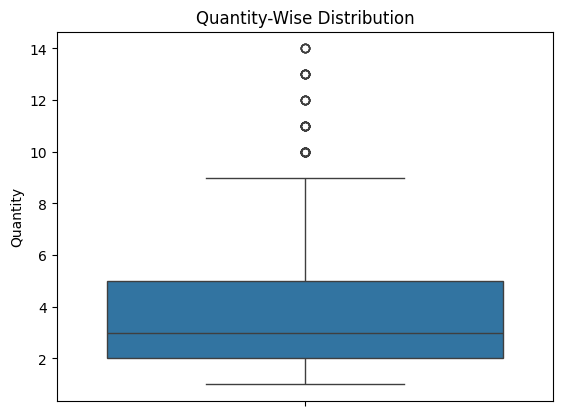

In [19]:
#quantity pattern distribution
sns.boxplot(corporate_data['Quantity'])
plt.title("Quantity-Wise Distribution")
plt.show()

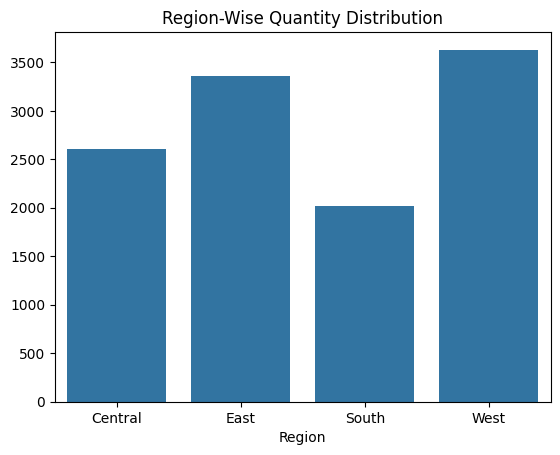

In [20]:
#quantity pattern distribution
quantity_by_region=corporate_data.groupby('Region')['Quantity'].sum()
sns.barplot(y=quantity_by_region.values,x=quantity_by_region.index)
plt.title("Region-Wise Quantity Distribution")
plt.show()

In [21]:
oe=OrdinalEncoder()
corporate_data['Ship Mode']=oe.fit_transform(corporate_data[['Ship Mode']])
corporate_data['City']=oe.fit_transform(corporate_data[['City']])
corporate_data['State']=oe.fit_transform(corporate_data[['State']])
corporate_data['Region']=oe.fit_transform(corporate_data[['Region']])
corporate_data['Category']=oe.fit_transform(corporate_data[['Category']])
corporate_data['Sub-Category']=oe.fit_transform(corporate_data[['Sub-Category']])
corporate_data['Segment']=oe.fit_transform(corporate_data[['Segment']])
corporate_data['Country']=oe.fit_transform(corporate_data[['Country']])

<ipython-input-21-80ffab47515d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corporate_data['Ship Mode']=oe.fit_transform(corporate_data[['Ship Mode']])
<ipython-input-21-80ffab47515d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corporate_data['City']=oe.fit_transform(corporate_data[['City']])
<ipython-input-21-80ffab47515d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [22]:
corporate_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,2.0,DV-13045,Darrin Van Huff,0.0,0.0,168.0,...,90036,3.0,OFF-LA-10000240,1.0,10.0,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
21,22,CA-2016-137330,2016-12-09,2016-12-13,3.0,KB-16585,Ken Black,0.0,0.0,106.0,...,68025,0.0,OFF-AR-10000246,1.0,2.0,Newell 318,19.460,7,0.0,5.0596
22,23,CA-2016-137330,2016-12-09,2016-12-13,3.0,KB-16585,Ken Black,0.0,0.0,106.0,...,68025,0.0,OFF-AP-10001492,1.0,1.0,"Acco Six-Outlet Power Strip, 4' Cord Length",60.340,7,0.0,15.6884
35,36,CA-2016-117590,2016-12-08,2016-12-10,0.0,GH-14485,Gene Hale,0.0,0.0,262.0,...,75080,0.0,TEC-PH-10004977,2.0,13.0,GE 30524EE4,1097.544,7,0.2,123.4737
36,37,CA-2016-117590,2016-12-08,2016-12-10,0.0,GH-14485,Gene Hale,0.0,0.0,262.0,...,75080,0.0,FUR-FU-10003664,0.0,9.0,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,0.6,-147.9630


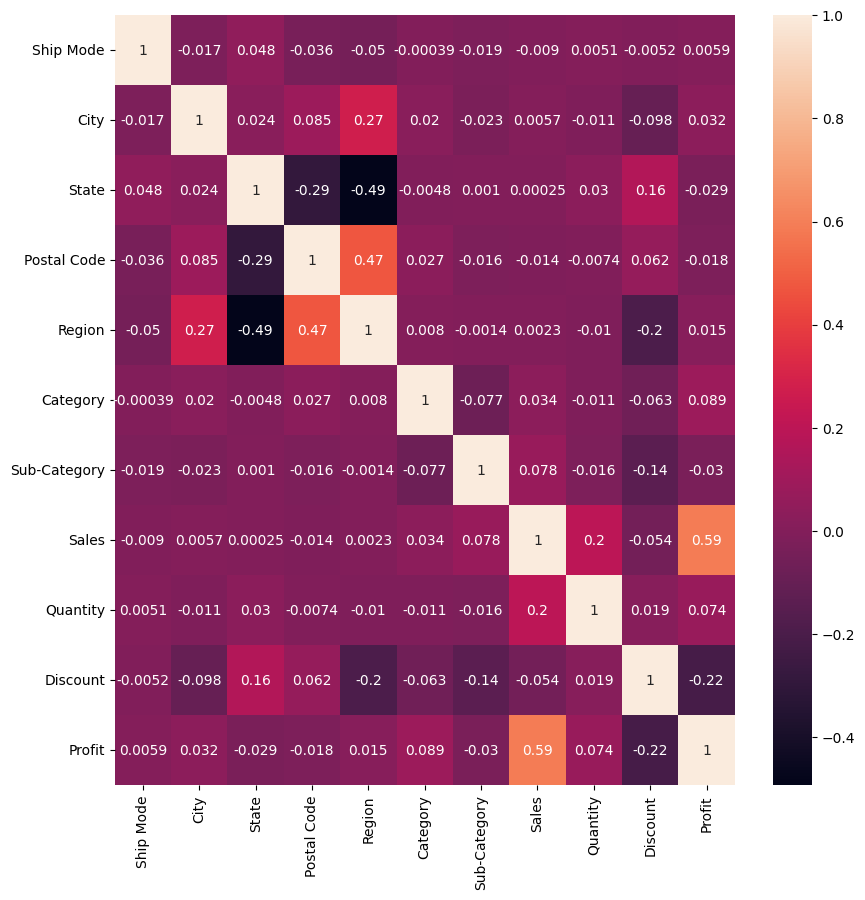

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(corporate_data.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1).corr(),annot=True)
plt.show()

In [24]:
mod_corporate_data=pd.DataFrame(corporate_data.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1))
mod_corporate_data.head()

,Ship Mode,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,2.0,168.0,3.0,90036,3.0,1.0,10.0,14.620,2,0.0,6.8714
21,3.0,106.0,24.0,68025,0.0,1.0,2.0,19.460,7,0.0,5.0596
22,3.0,106.0,24.0,68025,0.0,1.0,1.0,60.340,7,0.0,15.6884
35,0.0,262.0,39.0,75080,0.0,2.0,13.0,1097.544,7,0.2,123.4737
36,0.0,262.0,39.0,75080,0.0,0.0,9.0,190.920,5,0.6,-147.9630


In [25]:
for i in mod_corporate_data.columns:
  print(i,':','\t',mod_corporate_data[i].isnull().sum())
  print("\n")
  print(i,':','\n',mod_corporate_data[i].unique())
  print("\n")
  print("\n")

Ship Mode : 	 0


Ship Mode : 
 [2. 3. 0. 1.]




City : 	 0


City : 
 [168. 106. 262. 205. 183.  88. 209. 110. 133.  77.  87. 275.  37.  65.
 237. 282. 104. 283.  57. 112. 256.  75. 182.  83.  53. 288. 232.  52.
  59. 137. 304.  63.  25. 306.  11. 120. 276. 165. 127. 204. 174. 251.
 235. 326. 331. 290. 263. 157.  46. 280.   0. 213.   4. 162. 231. 316.
   5.  76. 325. 193. 291. 320.  43.  60.  49. 203. 128. 281. 141. 115.
  14.  33.  82.  64. 265. 198. 192. 305. 103. 161. 278. 298. 153.  16.
  99. 264. 313. 322. 312. 218.   7. 147.  74. 260.  70.  81. 117. 169.
 173.  98.  80. 216.  10.  17. 187. 196. 208. 139. 243. 210. 189.  36.
 328.  26. 114.  84. 293. 215.  86. 100.  20. 143. 317.  18. 269.  34.
 126. 134. 136.   8. 255.  48. 200.  35.  55. 159. 152. 236. 253. 188.
 302. 337. 279. 160.  21. 190. 292. 101. 135.   1. 296.  62. 330. 163.
 148. 289. 121. 301.  47. 274. 249. 171. 132. 244. 315.  71. 222. 258.
 335. 230. 129. 219.  30. 118. 248. 151. 176. 303. 334. 195. 107. 234.
 307.

In [30]:
for i in mod_corporate_data.columns[7:11]:
  print(i,':\n')
  q1=mod_corporate_data[i].quantile(0.25)
  q3=mod_corporate_data[i].quantile(0.75)
  iqr=q3-q1
  upper_bound=q3+1.5*iqr
  lower_bound=q1-1.5*iqr
  print(f'upper limit of {i}:',upper_bound)
  print(f'lower limit of {i}:',lower_bound)
  print("\n")

Sales :

upper limit of Sales: 506.034
lower limit of Sales: -275.67


Quantity :

upper limit of Quantity: 9.5
lower limit of Quantity: -2.5


Discount :

upper limit of Discount: 0.5
lower limit of Discount: -0.30000000000000004


Profit :

upper limit of Profit: 71.71615
lower limit of Profit: -39.94425




In [33]:
mod_corporate_data=mod_corporate_data[
    (mod_corporate_data['Sales']>=0) & (mod_corporate_data['Sales']<=506.034) &
    (mod_corporate_data['Quantity']>=0) & (mod_corporate_data['Quantity']<=9.5) &
    (mod_corporate_data['Discount']>=0) & (mod_corporate_data['Discount']<=0.5) &
    (mod_corporate_data['Profit']>=-39.94425) & (mod_corporate_data['Profit']<=71.71615) ]

In [34]:
#splitting the dataset
x=mod_corporate_data.drop(columns=['Sales','Profit'],axis='1')
y=mod_corporate_data['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.5,random_state=4)

**Predictive Models**

In [35]:
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor(max_features=200)
model_4 = GradientBoostingRegressor()
model_5 = AdaBoostRegressor()
model_6 = DecisionTreeRegressor(max_depth=2)
model_7 = KNeighborsRegressor()
model_8 = SVR()
model_9=Ridge()
model_10=Lasso()

In [36]:
model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)
model_3.fit(x_train, y_train)
model_4.fit(x_train, y_train)
model_5.fit(x_train, y_train)
model_6.fit(x_train, y_train)
model_7.fit(x_train, y_train)
model_8.fit(x_train, y_train)
model_9.fit(x_train, y_train)
model_10.fit(x_train, y_train)

Lasso()

In [37]:
pred_1 = model_1.predict(x_test)
pred_2 = model_2.predict(x_test)
pred_3 = model_3.predict(x_test)
pred_4=model_4.predict(x_test)
pred_5=model_5.predict(x_test)
pred_6=model_6.predict(x_test)
pred_7=model_7.predict(x_test)
pred_8=model_8.predict(x_test)
pred_9=model_9.predict(x_test)
pred_10=model_10.predict(x_test)

In [38]:
pred1 = model_1.predict(x_val)
pred2 = model_2.predict(x_val)
pred3 = model_3.predict(x_val)
pred4=model_4.predict(x_val)
pred5=model_5.predict(x_val)
pred6=model_6.predict(x_val)
pred7=model_7.predict(x_val)
pred8=model_8.predict(x_val)
pred9=model_9.predict(x_val)
pred10=model_10.predict(x_val)

**Predictive Model's Performance**

test set for model1
Performance of Model 1:

Mean Squared Error: 10868.346993027644 

Root Mean Squared Error: 104.25136446602339 

Mean Absolute Error: 63.670134900158246 

Explained Variance Score: 0.15323190476664017 

R2 Score: -0.32928250354113286 





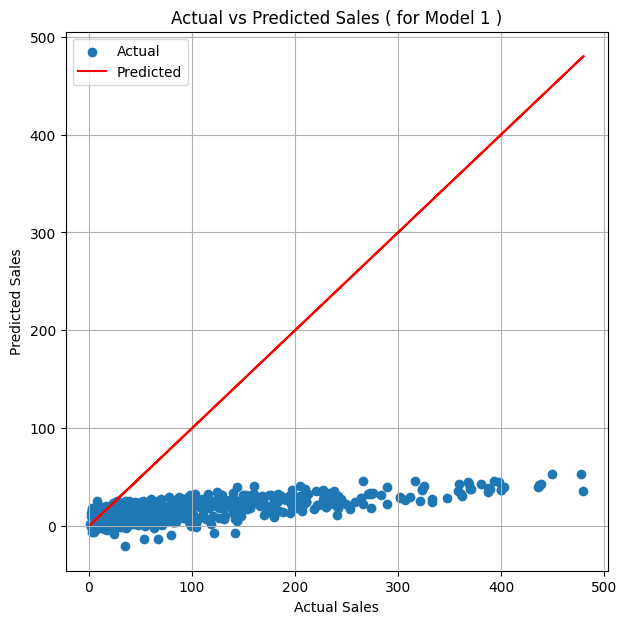



validation set for model1
Performance of Model 1:

Mean Squared Error: 11823.522479762834 

Root Mean Squared Error: 108.73602199714148 

Mean Absolute Error: 65.32627156939321 

Explained Variance Score: 0.14904757335372587 

R2 Score: -0.30999929751826816 





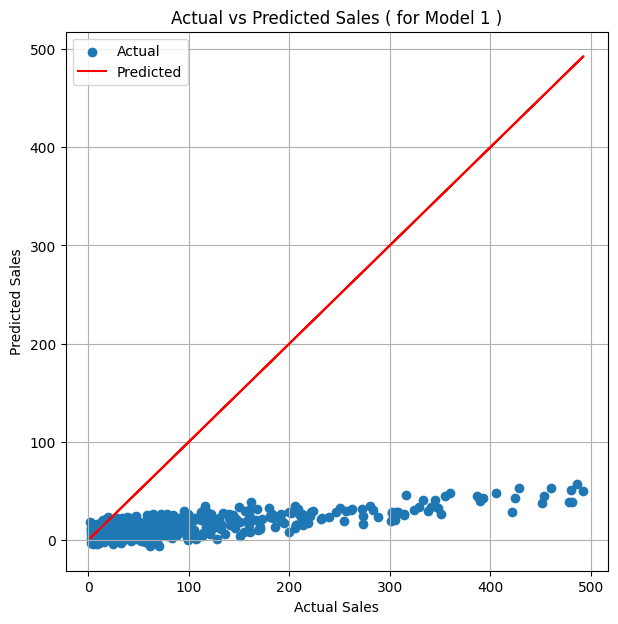

test set for model2
Performance of Model 2:

Mean Squared Error: 10993.289470891157 

Root Mean Squared Error: 104.84888874418822 

Mean Absolute Error: 63.29860577934876 

Explained Variance Score: 0.14548797418601112 

R2 Score: -0.3445639304112531 





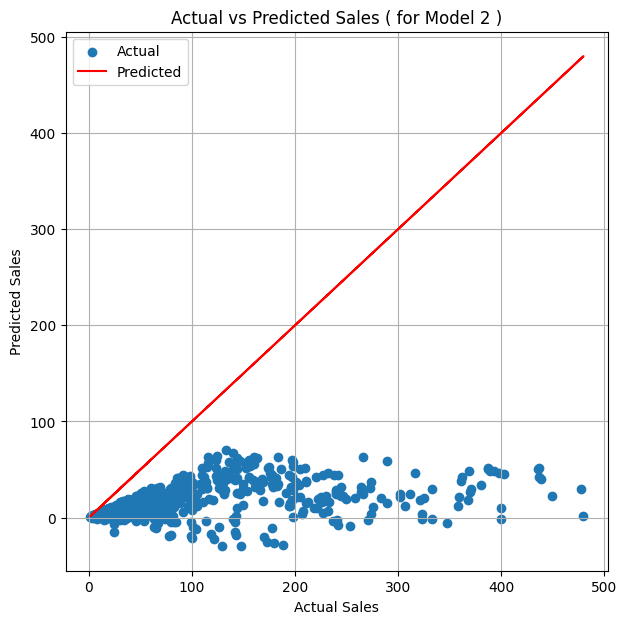



validation set for model2
Performance of Model 2:

Mean Squared Error: 12169.845833263265 

Root Mean Squared Error: 110.31702422229883 

Mean Absolute Error: 64.92431433880996 

Explained Variance Score: 0.11860611194169379 

R2 Score: -0.3483705486049269 





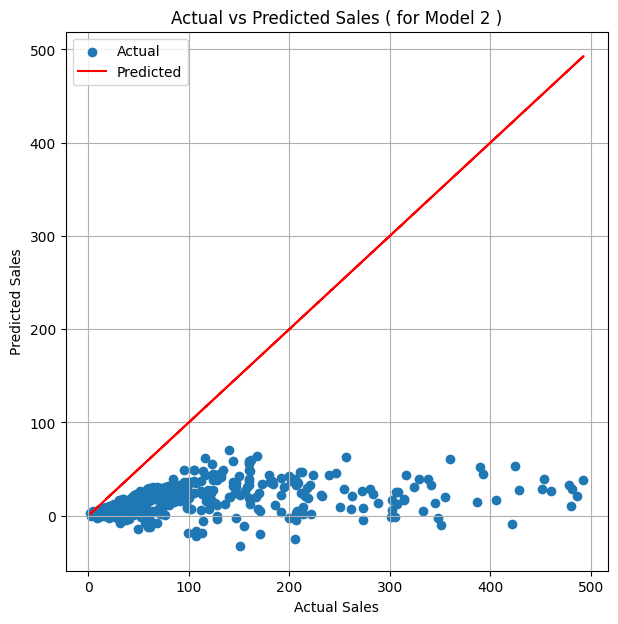

test set for model3
Performance of Model 3:

Mean Squared Error: 11085.994600203805 

Root Mean Squared Error: 105.29004986324114 

Mean Absolute Error: 63.35883485064177 

Explained Variance Score: 0.13508244259773594 

R2 Score: -0.3559024813852769 





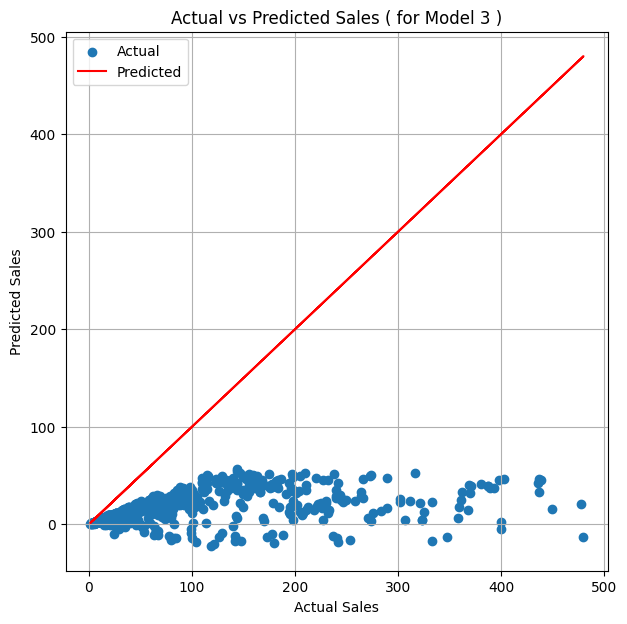



validation set for model3
Performance of Model 3:

Mean Squared Error: 12217.726640564055 

Root Mean Squared Error: 110.5338257754795 

Mean Absolute Error: 64.79784817418351 

Explained Variance Score: 0.11153049302724383 

R2 Score: -0.35367555174895604 





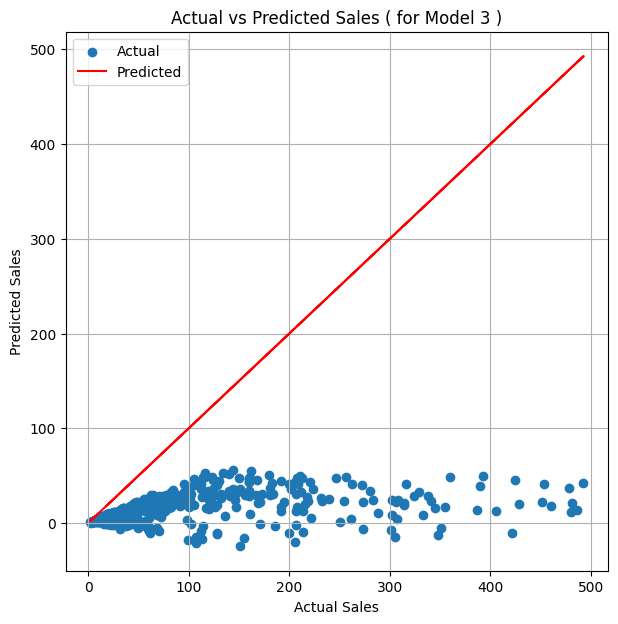

test set for model4
Performance of Model 4:

Mean Squared Error: 10928.126959875552 

Root Mean Squared Error: 104.53768200929056 

Mean Absolute Error: 62.98385101994458 

Explained Variance Score: 0.14847379882668355 

R2 Score: -0.3365940536824903 





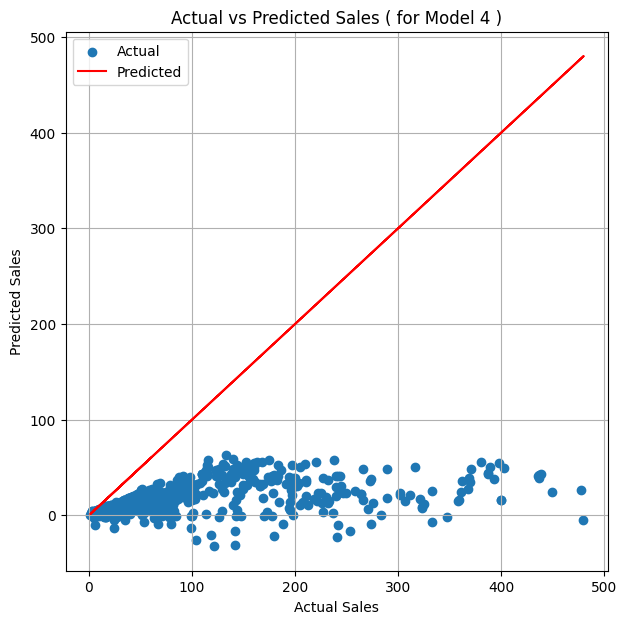



validation set for model4
Performance of Model 4:

Mean Squared Error: 12064.923270040057 

Root Mean Squared Error: 109.8404446005207 

Mean Absolute Error: 64.60763192300784 

Explained Variance Score: 0.12569399061025888 

R2 Score: -0.33674554562028547 





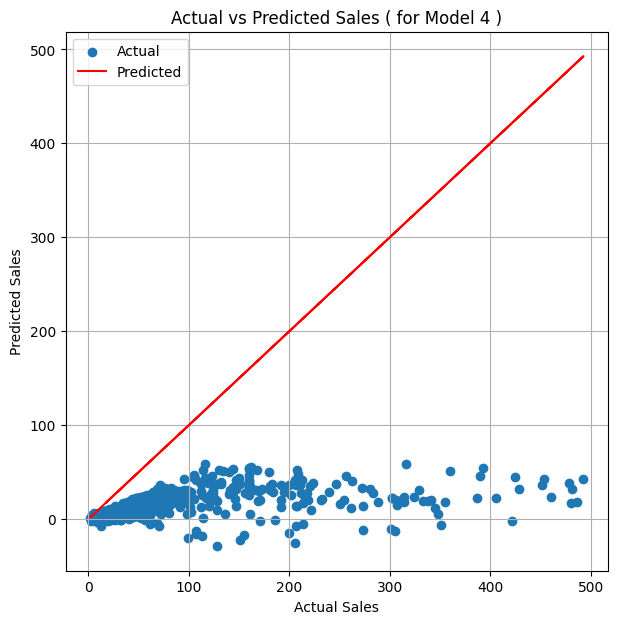

test set for model5
Performance of Model 5:

Mean Squared Error: 11247.775479818252 

Root Mean Squared Error: 106.05553017084141 

Mean Absolute Error: 63.76052035259177 

Explained Variance Score: 0.11370351475499074 

R2 Score: -0.3756895283775141 





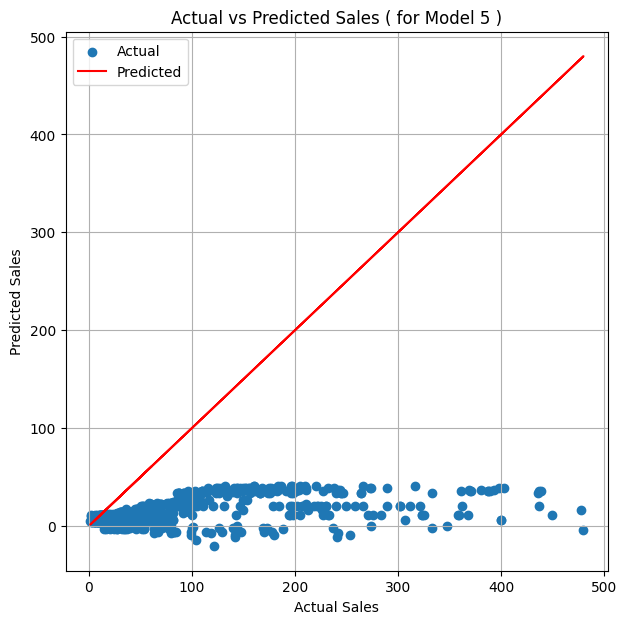



validation set for model5
Performance of Model 5:

Mean Squared Error: 12424.255363515742 

Root Mean Squared Error: 111.46414384687007 

Mean Absolute Error: 65.40545596027775 

Explained Variance Score: 0.08968044554160293 

R2 Score: -0.37655811339225087 





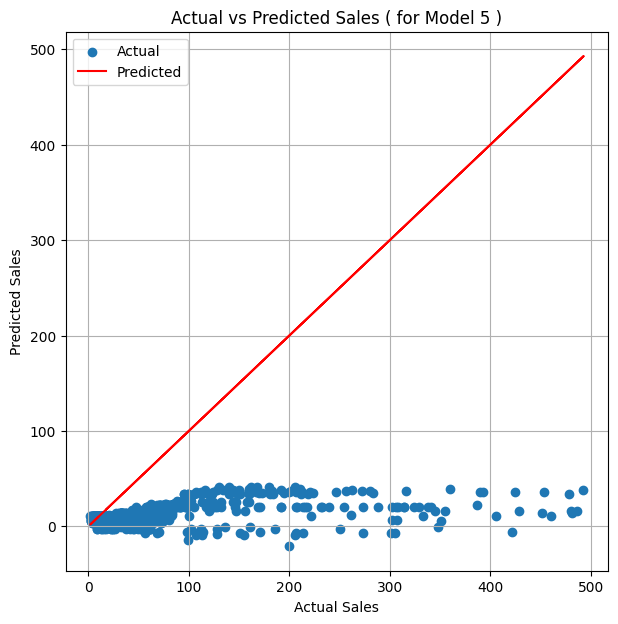

test set for model6
Performance of Model 6:

Mean Squared Error: 11131.544765117742 

Root Mean Squared Error: 105.5061361491252 

Mean Absolute Error: 63.54587023349817 

Explained Variance Score: 0.13086057319971445 

R2 Score: -0.36147361720679183 





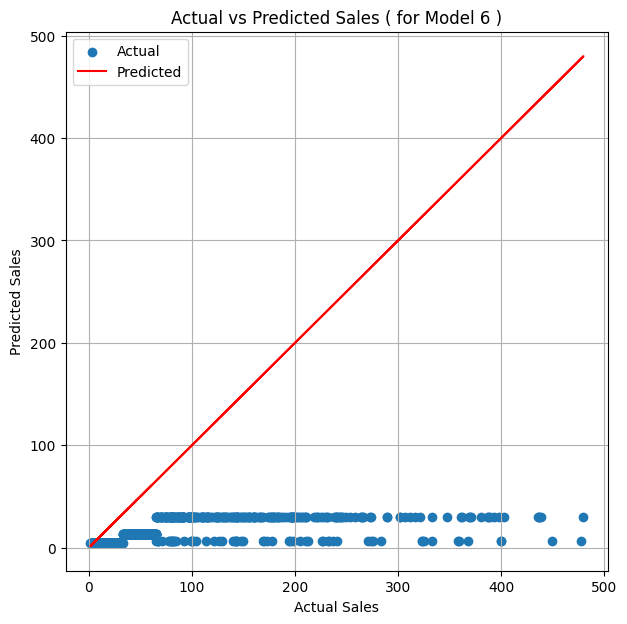



validation set for model6
Performance of Model 6:

Mean Squared Error: 12023.38572705961 

Root Mean Squared Error: 109.65120029921975 

Mean Absolute Error: 64.0930071282805 

Explained Variance Score: 0.12206817286032712 

R2 Score: -0.3321433509512979 





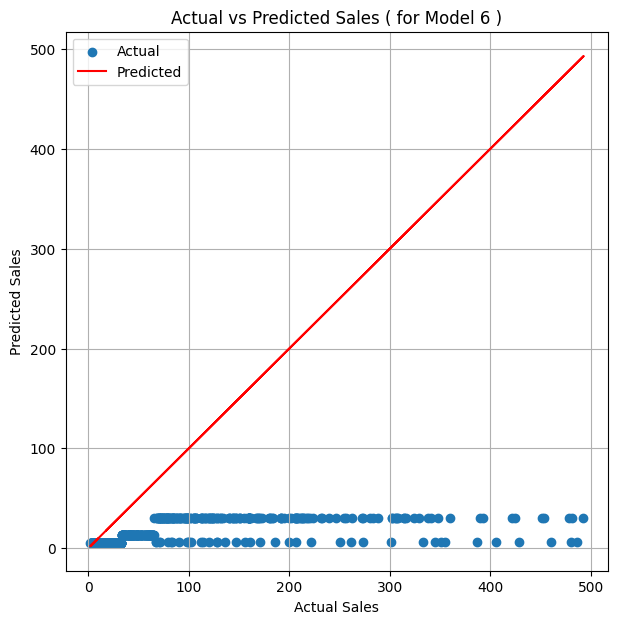

test set for model7
Performance of Model 7:

Mean Squared Error: 11795.06505498713 

Root Mean Squared Error: 108.60508761097304 

Mean Absolute Error: 65.5806646907818 

Explained Variance Score: 0.06116123311705601 

R2 Score: -0.4426272565443792 





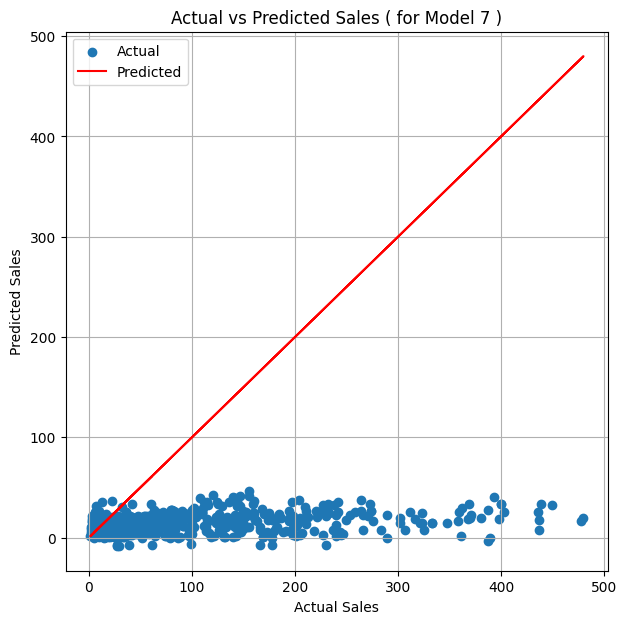



validation set for model7
Performance of Model 7:

Mean Squared Error: 12763.216386458329 

Root Mean Squared Error: 112.9744058911501 

Mean Absolute Error: 66.86251066874028 

Explained Variance Score: 0.05859617890905111 

R2 Score: -0.4141136475150877 





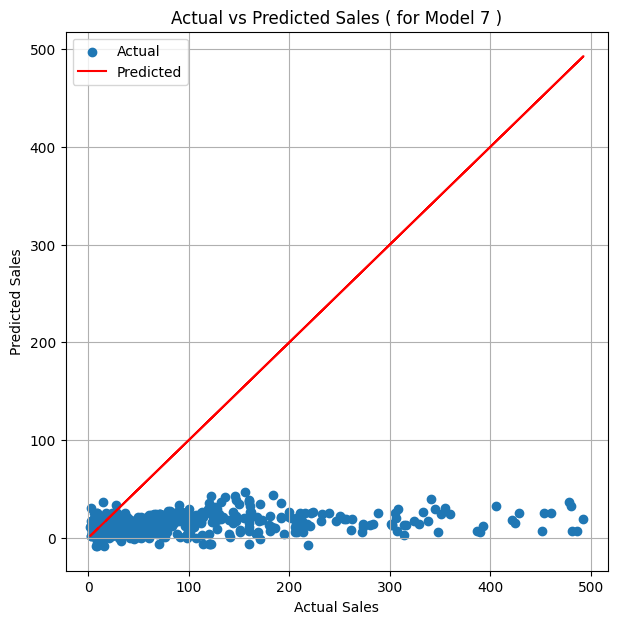

test set for model8
Performance of Model 8:

Mean Squared Error: 12887.415248782372 

Root Mean Squared Error: 113.52275211948648 

Mean Absolute Error: 69.23168782284995 

Explained Variance Score: -0.0002545827215683083 

R2 Score: -0.5762300943340917 





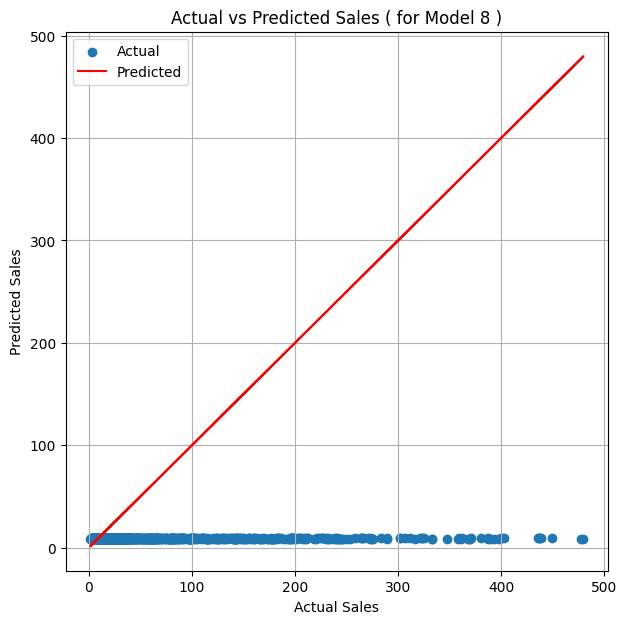



validation set for model8
Performance of Model 8:

Mean Squared Error: 13829.263244237605 

Root Mean Squared Error: 117.59788792422084 

Mean Absolute Error: 69.91387770654289 

Explained Variance Score: 0.0004588456132503804 

R2 Score: -0.5322274022952473 





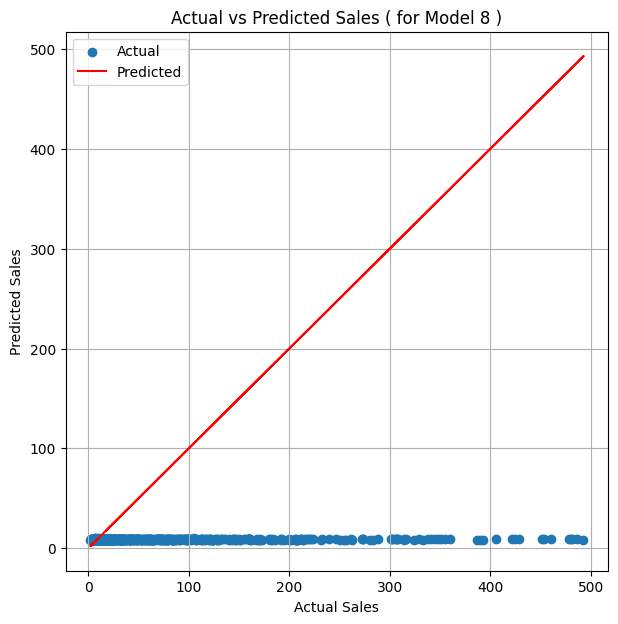

test set for model9
Performance of Model 9:

Mean Squared Error: 10869.852106944938 

Root Mean Squared Error: 104.25858289342388 

Mean Absolute Error: 63.632165197512755 

Explained Variance Score: 0.1538718041869287 

R2 Score: -0.3294665905598284 





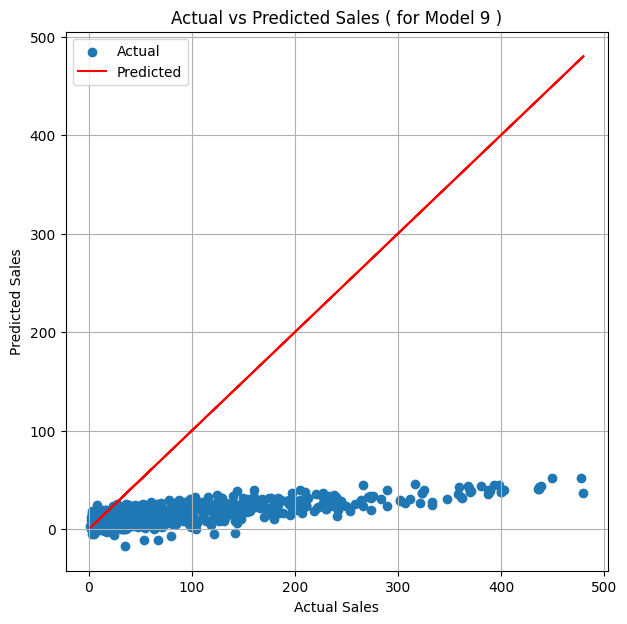



validation set for model9
Performance of Model 9:

Mean Squared Error: 11814.589609445498 

Root Mean Squared Error: 108.69493828806151 

Mean Absolute Error: 65.19440133354452 

Explained Variance Score: 0.1498655670311866 

R2 Score: -0.309009570991291 





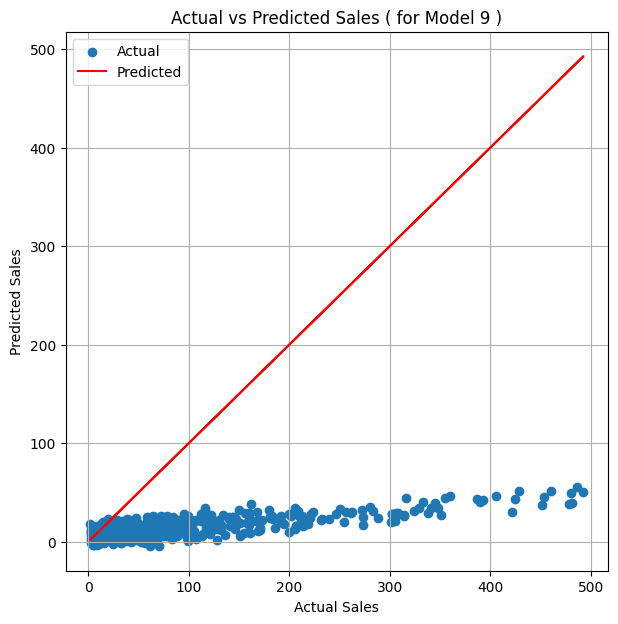

test set for model10
Performance of Model 10:

Mean Squared Error: 10879.338707108642 

Root Mean Squared Error: 104.30406850697935 

Mean Absolute Error: 63.61808982998375 

Explained Variance Score: 0.1572397557362465 

R2 Score: -0.3306268747892327 





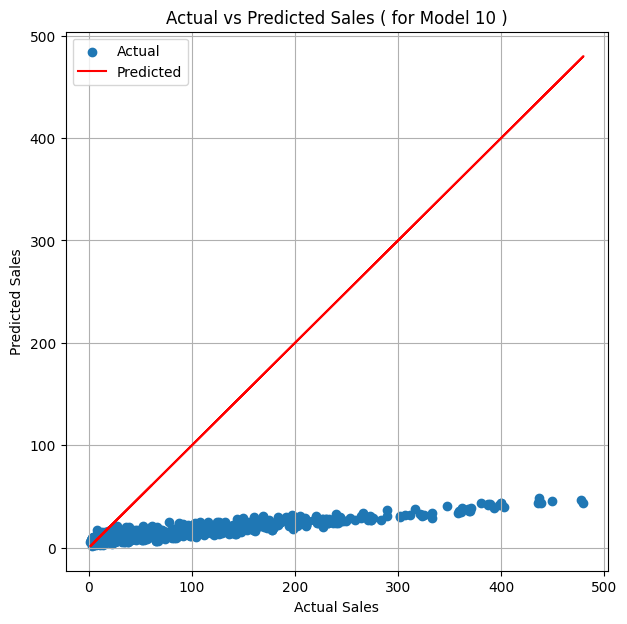



validation set for model10
Performance of Model 10:

Mean Squared Error: 11715.26084020489 

Root Mean Squared Error: 108.237058534519 

Mean Absolute Error: 64.54740548840559 

Explained Variance Score: 0.15729982906644435 

R2 Score: -0.29800433814708005 





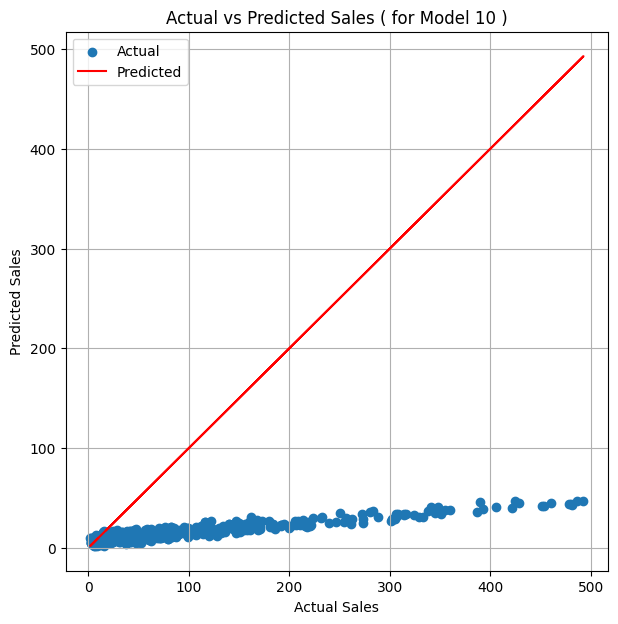

In [56]:
j=1
for i,k in zip([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10],
               [pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,pred10]):
  print(f'test set for model{j}')
  print(f"Performance of Model {j}:\n")
  print("Mean Squared Error:", mean_squared_error(y_test, i),"\n")
  print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, i)),"\n")
  print("Mean Absolute Error:", mean_absolute_error(y_test, i),"\n")
  print("Explained Variance Score:", explained_variance_score(y_test, i),"\n")
  print("R2 Score:", r2_score(y_test, i),"\n")
  print("\n")
  plt.figure(figsize=(7,7))
  plt.scatter(y_test,i)
  plt.plot(y_test,y_test,'r')
  plt.xlabel("Actual Sales")
  plt.ylabel(f"Predicted Sales")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Sales ( for Model {j} )")
  plt.grid(True)
  plt.show()
  print("\n")
  print(f'validation set for model{j}')
  print(f"Performance of Model {j}:\n")
  print("Mean Squared Error:", mean_squared_error(y_val, k),"\n")
  print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_val, k)),"\n")
  print("Mean Absolute Error:", mean_absolute_error(y_val, k),"\n")
  print("Explained Variance Score:", explained_variance_score(y_val, k),"\n")
  print("R2 Score:", r2_score(y_val, k),"\n")
  print("\n")
  plt.figure(figsize=(7,7))
  plt.scatter(y_val,k)
  plt.plot(y_val,y_val,'r')
  plt.xlabel("Actual Sales")
  plt.ylabel(f"Predicted Sales")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Sales ( for Model {j} )")
  plt.grid(True)
  plt.show()
  j+=1

Mean Squared Error: 11219.50941879933
Root Mean Squared Error: 105.92218567797461
Mean Absolute Error: 63.99892719600591
Explained Variance Score: 0.1255661148495194
R2 Score: -0.37223237151818833




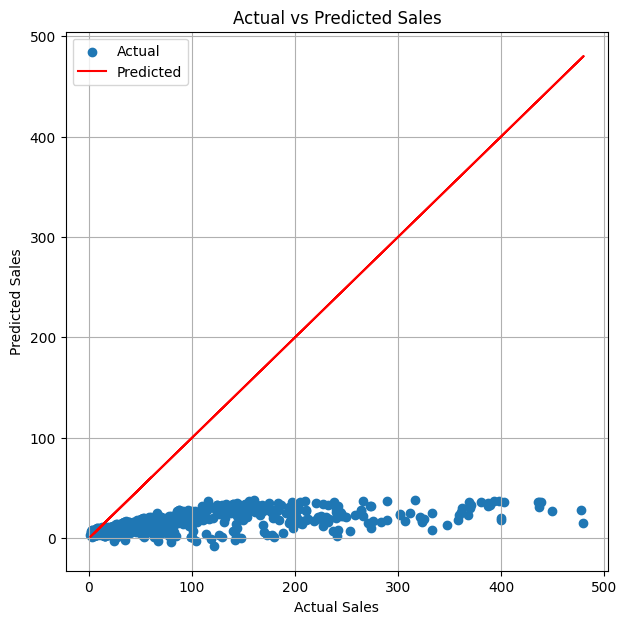

In [57]:
pred_final = np.mean([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10], axis=0)
print("Mean Squared Error:", mean_squared_error(y_test, pred_final))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, pred_final)))
print("Mean Absolute Error:", mean_absolute_error(y_test, pred_final))
print("Explained Variance Score:", explained_variance_score(y_test, pred_final))
print("R2 Score:", r2_score(y_test, pred_final))
print('\n')
plt.figure(figsize=(7,7))
plt.scatter(y_test,pred_final)
plt.plot(y_test,y_test,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

Mean Squared Error: 12237.102745858709
Root Mean Squared Error: 110.62143890701616
Mean Absolute Error: 65.27366874615505
Explained Variance Score: 0.11330716644689565
R2 Score: -0.35582234720420924




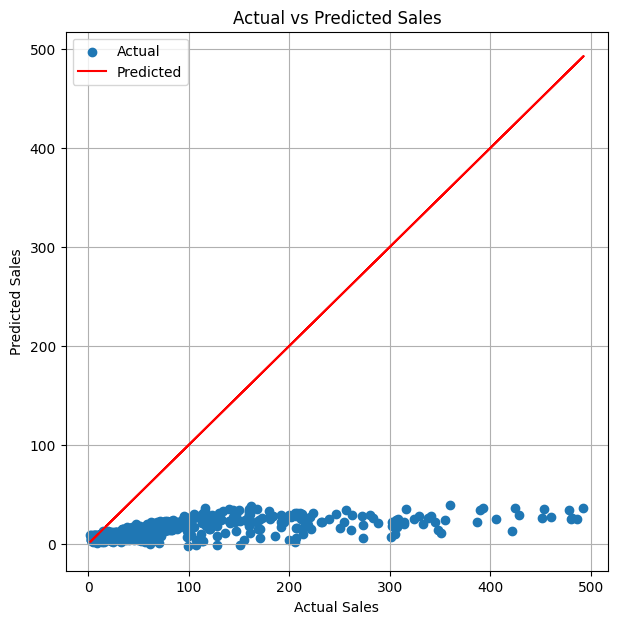

In [58]:
pred_final1 = np.mean([pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,pred10], axis=0)
print("Mean Squared Error:", mean_squared_error(y_val, pred_final1))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_val, pred_final1)))
print("Mean Absolute Error:", mean_absolute_error(y_val, pred_final1))
print("Explained Variance Score:", explained_variance_score(y_val, pred_final1))
print("R2 Score:", r2_score(y_val, pred_final1))
print('\n')
plt.figure(figsize=(7,7))
plt.scatter(y_val,pred_final1)
plt.plot(y_val,y_val,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()


In [43]:
m=mod_corporate_data.drop(columns=['Profit'],axis='1')
n=mod_corporate_data['Profit']
m_train,m_test,n_train,n_test=train_test_split(m,n,test_size=0.4,random_state=42)
m_train,m_val,n_train,n_val=train_test_split(m_train,n_train,test_size=0.5,random_state=4)

In [44]:
model_1.fit(m_train, n_train)
model_2.fit(m_train, n_train)
model_3.fit(m_train, n_train)
model_4.fit(m_train, n_train)
model_5.fit(m_train, n_train)
model_6.fit(m_train, n_train)
model_7.fit(m_train, n_train)
model_8.fit(m_train, n_train)
model_9.fit(m_train, n_train)
model_10.fit(m_train, n_train)

Lasso()

In [45]:
pred_1 = model_1.predict(m_test)
pred_2 = model_2.predict(m_test)
pred_3 = model_3.predict(m_test)
pred_4=model_4.predict(m_test)
pred_5=model_5.predict(m_test)
pred_6=model_6.predict(m_test)
pred_7=model_7.predict(m_test)
pred_8=model_8.predict(m_test)
pred_9=model_9.predict(m_test)
pred_10=model_10.predict(m_test)

In [46]:
pred1 = model_1.predict(m_val)
pred2 = model_2.predict(m_val)
pred3 = model_3.predict(m_val)
pred4=model_4.predict(m_val)
pred5=model_5.predict(m_val)
pred6=model_6.predict(m_val)
pred7=model_7.predict(m_val)
pred8=model_8.predict(m_val)
pred9=model_9.predict(m_val)
pred10=model_10.predict(m_val)

test set for model1
Performance of Model 1:

Mean Squared Error: 213.80690816045515 

Root Mean Squared Error: 14.62213760571467 

Mean Absolute Error: 9.938083862760923 

Explained Variance Score: 0.34373258395210404 

R2 Score: 0.3410578314160648 





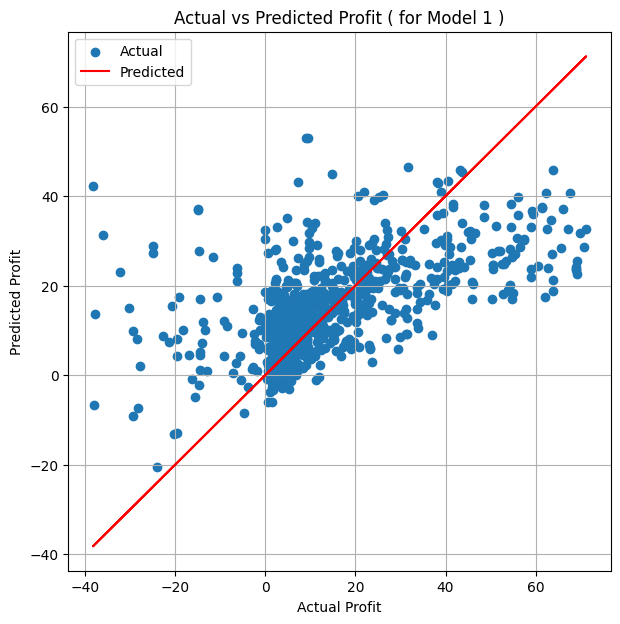



validation set for model1
Performance of Model 1:

Mean Squared Error: 219.21322004565516 

Root Mean Squared Error: 14.805850872059166 

Mean Absolute Error: 9.884541999292685 

Explained Variance Score: 0.20358042183766467 

R2 Score: 0.1860369978989952 





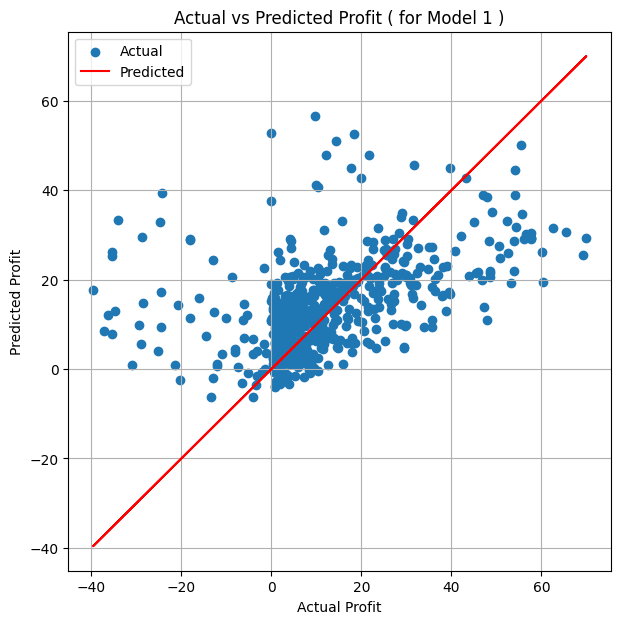

test set for model2
Performance of Model 2:

Mean Squared Error: 133.41524106073285 

Root Mean Squared Error: 11.550551547901636 

Mean Absolute Error: 6.104101657359159 

Explained Variance Score: 0.589425513035722 

R2 Score: 0.58882091779405 





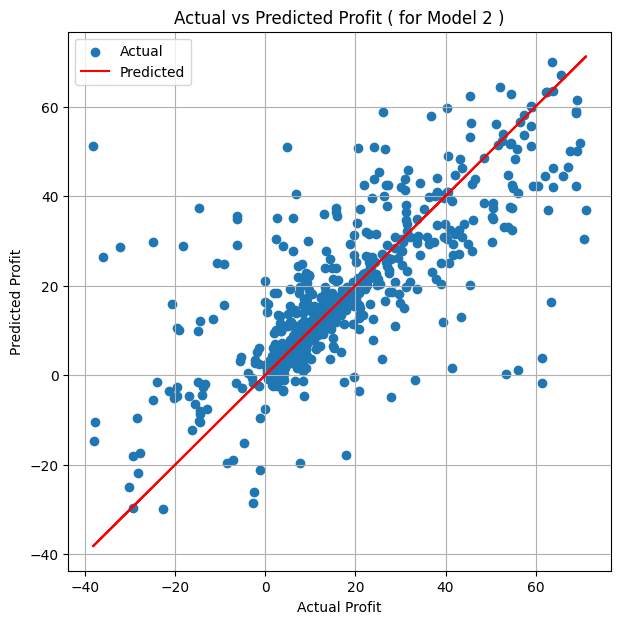



validation set for model2
Performance of Model 2:

Mean Squared Error: 154.8310524055547 

Root Mean Squared Error: 12.443112649395838 

Mean Absolute Error: 6.51291928204552 

Explained Variance Score: 0.43484061775021243 

R2 Score: 0.4250951278931264 





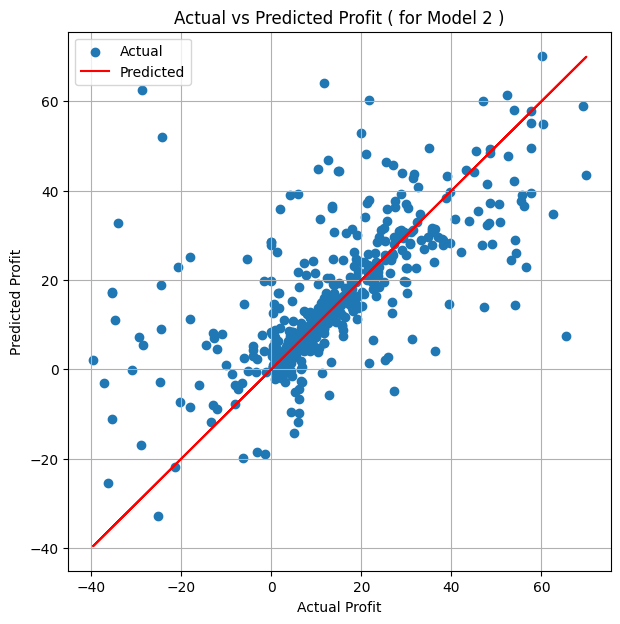

test set for model3
Performance of Model 3:

Mean Squared Error: 129.66193040366565 

Root Mean Squared Error: 11.386919267460609 

Mean Absolute Error: 6.007646353558926 

Explained Variance Score: 0.6008397780573986 

R2 Score: 0.6003884330114768 





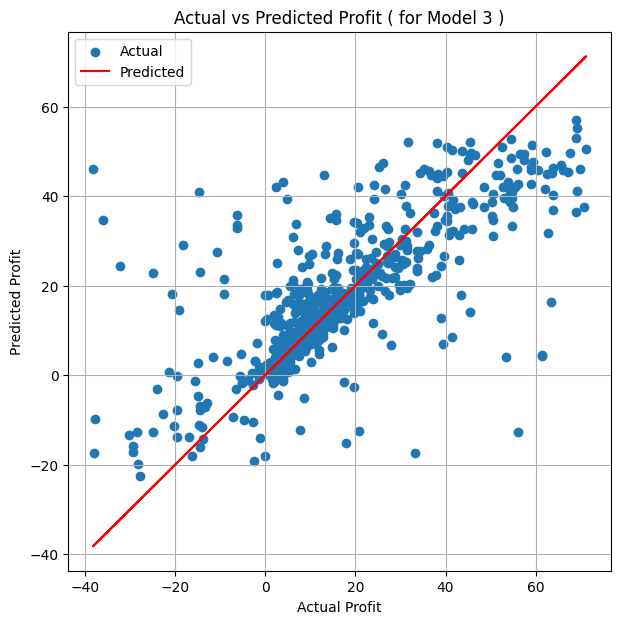



validation set for model3
Performance of Model 3:

Mean Squared Error: 143.97978462867655 

Root Mean Squared Error: 11.999157663297726 

Mean Absolute Error: 6.455978485225504 

Explained Variance Score: 0.47667110252738254 

R2 Score: 0.46538708881788315 





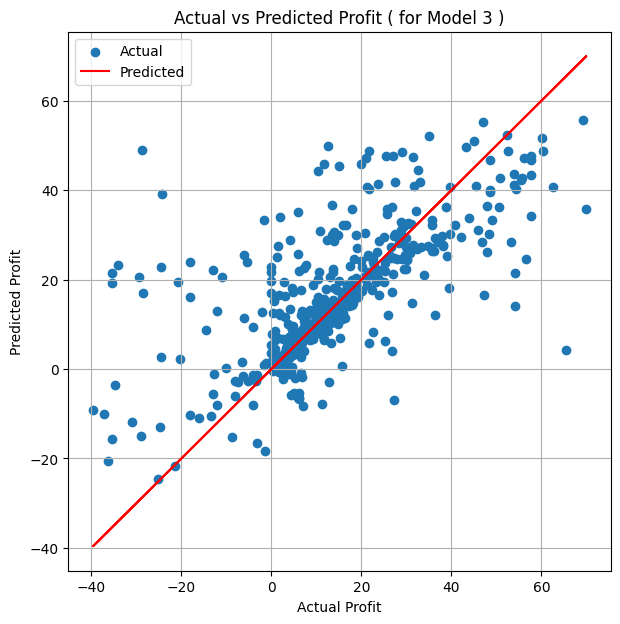

test set for model4
Performance of Model 4:

Mean Squared Error: 133.3072975003063 

Root Mean Squared Error: 11.54587794411089 

Mean Absolute Error: 6.086763041957899 

Explained Variance Score: 0.5909601753931168 

R2 Score: 0.5891535944339403 





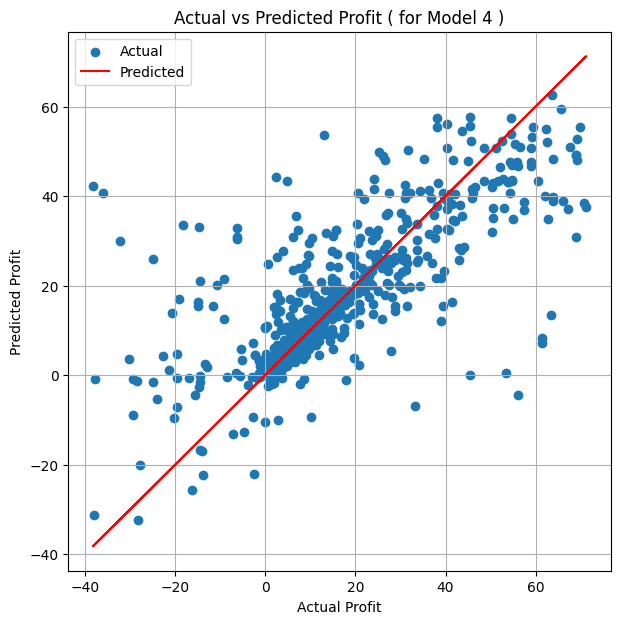



validation set for model4
Performance of Model 4:

Mean Squared Error: 133.749595747848 

Root Mean Squared Error: 11.565016028862562 

Mean Absolute Error: 6.199987563785569 

Explained Variance Score: 0.5172931946120226 

R2 Score: 0.5033729149088703 





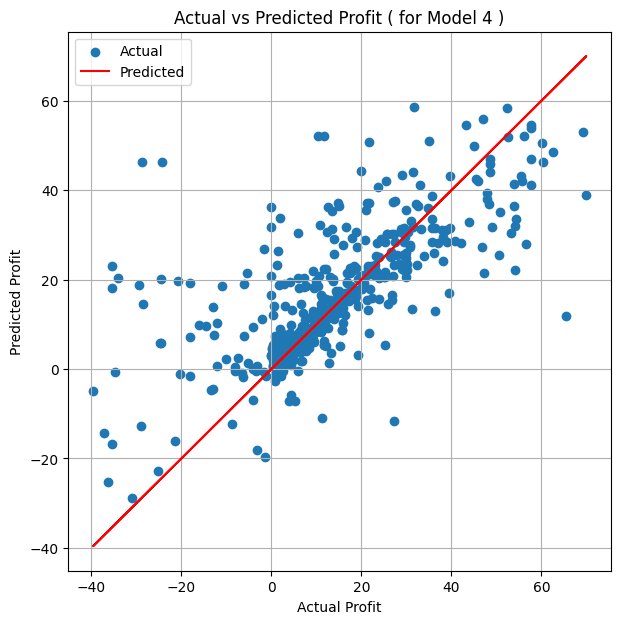

test set for model5
Performance of Model 5:

Mean Squared Error: 154.77376312350597 

Root Mean Squared Error: 12.440810388536029 

Mean Absolute Error: 8.048243943065938 

Explained Variance Score: 0.5237214115802664 

R2 Score: 0.5229950239214842 





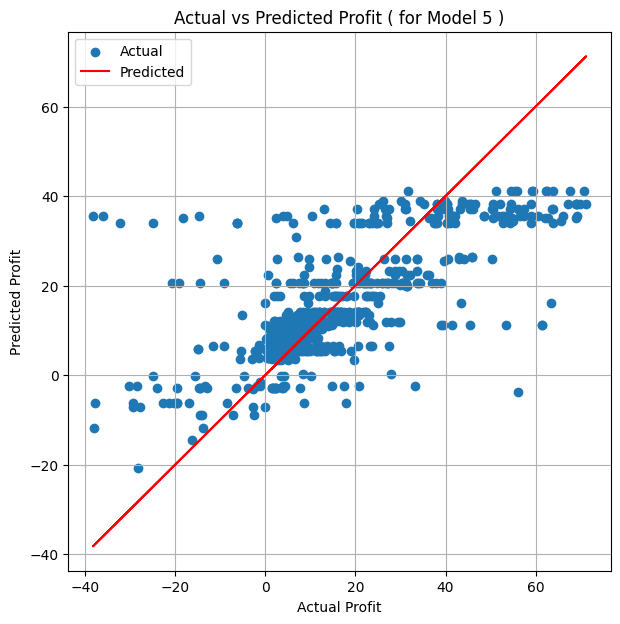



validation set for model5
Performance of Model 5:

Mean Squared Error: 154.47200036926137 

Root Mean Squared Error: 12.428676533294338 

Mean Absolute Error: 8.247083319941694 

Explained Variance Score: 0.43680111703716307 

R2 Score: 0.4264283279314769 





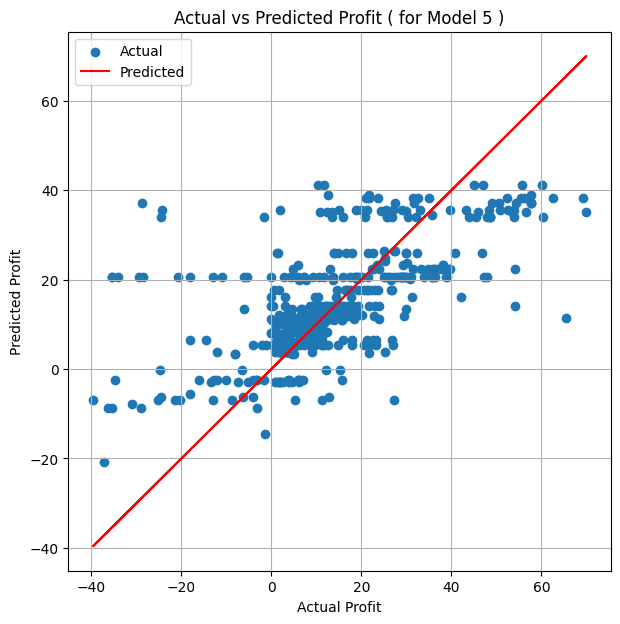

test set for model6
Performance of Model 6:

Mean Squared Error: 218.86206563174807 

Root Mean Squared Error: 14.793987482479093 

Mean Absolute Error: 9.297509609174757 

Explained Variance Score: 0.32574754735349565 

R2 Score: 0.3254780896045084 





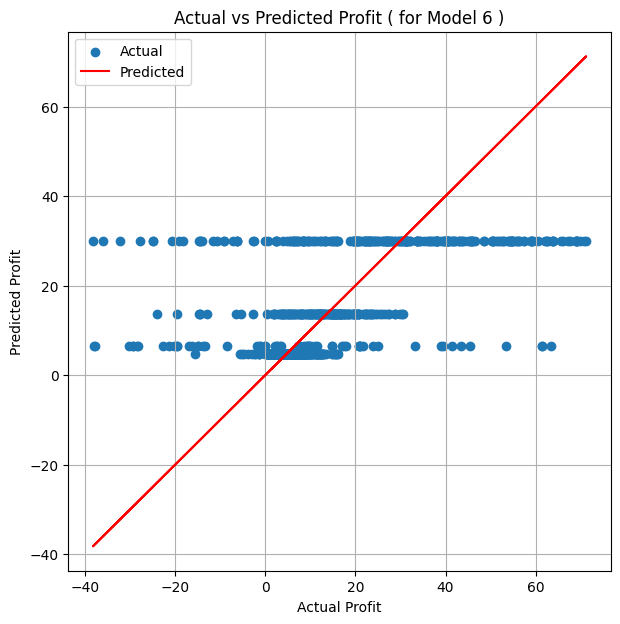



validation set for model6
Performance of Model 6:

Mean Squared Error: 239.88072295553116 

Root Mean Squared Error: 15.488083256346835 

Mean Absolute Error: 9.257429898815403 

Explained Variance Score: 0.1327553843892476 

R2 Score: 0.10929626706647377 





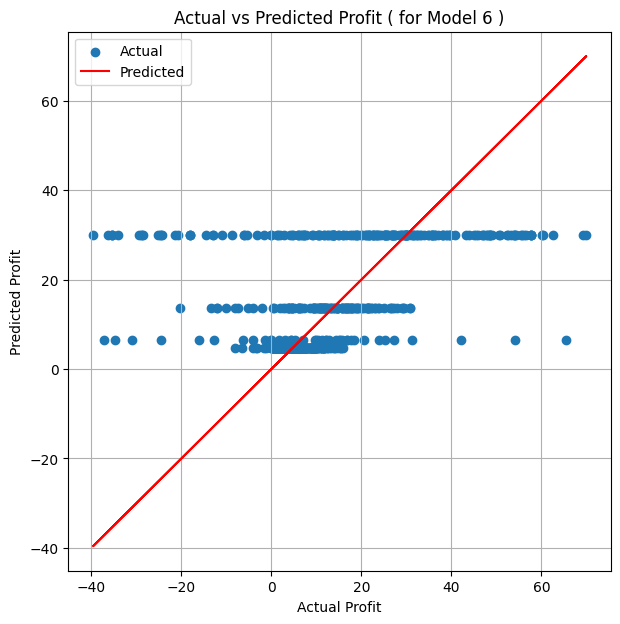

test set for model7
Performance of Model 7:

Mean Squared Error: 279.8602462317442 

Root Mean Squared Error: 16.72902406692465 

Mean Absolute Error: 11.495037992998833 

Explained Variance Score: 0.13807631272247944 

R2 Score: 0.13748475603985344 





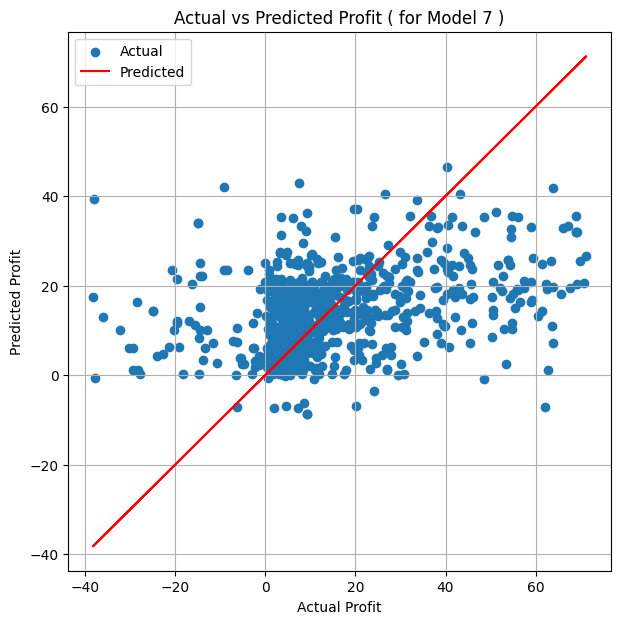



validation set for model7
Performance of Model 7:

Mean Squared Error: 260.24091030967645 

Root Mean Squared Error: 16.131984078521665 

Mean Absolute Error: 11.085571726283048 

Explained Variance Score: 0.0392482433462753 

R2 Score: 0.03369663298114112 





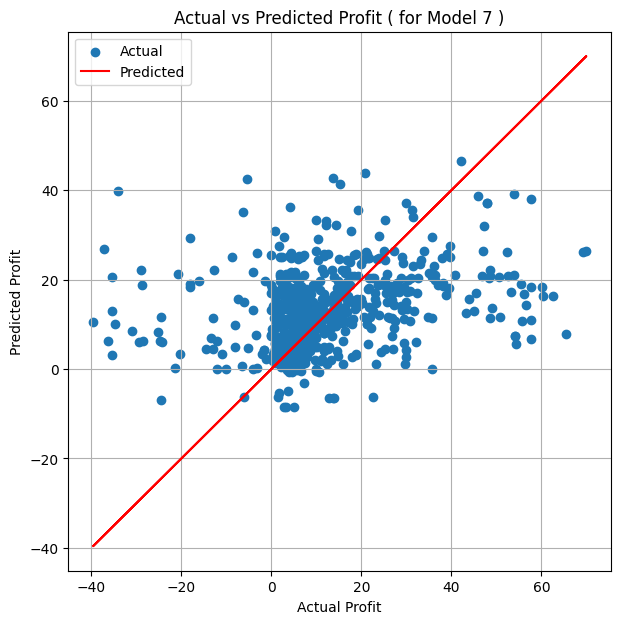

test set for model8
Performance of Model 8:

Mean Squared Error: 347.67319069148147 

Root Mean Squared Error: 18.645996639801304 

Mean Absolute Error: 12.33702606496432 

Explained Variance Score: 0.001953712414925257 

R2 Score: -0.07151133798170517 





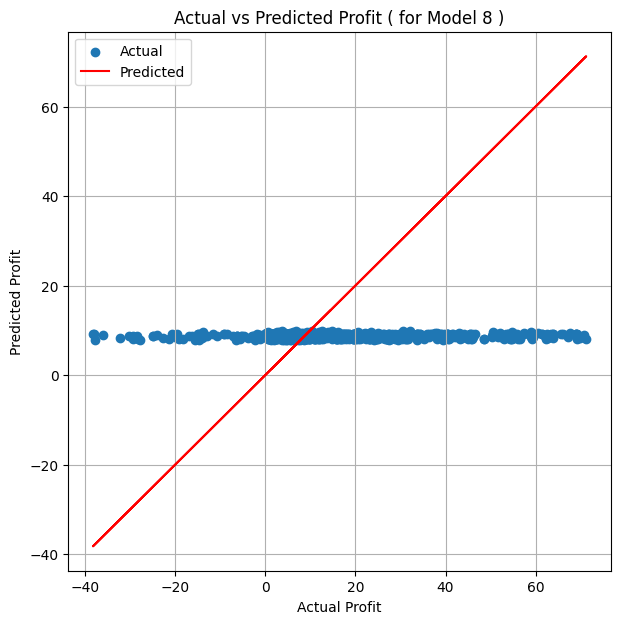



validation set for model8
Performance of Model 8:

Mean Squared Error: 276.1359253338058 

Root Mean Squared Error: 16.617338094105378 

Mean Absolute Error: 11.273827147162827 

Explained Variance Score: 0.0037305828732220325 

R2 Score: -0.0253233209467576 





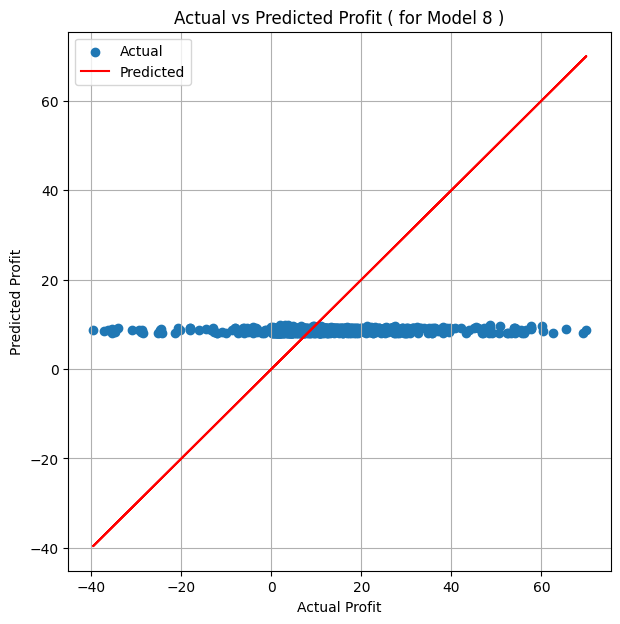

test set for model9
Performance of Model 9:

Mean Squared Error: 215.90673544625062 

Root Mean Squared Error: 14.693765189571073 

Mean Absolute Error: 9.842339497288089 

Explained Variance Score: 0.3369620508119878 

R2 Score: 0.3345862690270919 





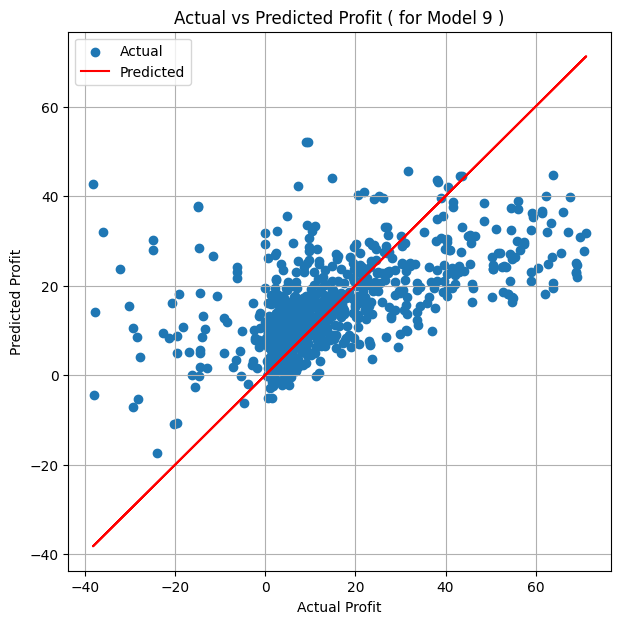



validation set for model9
Performance of Model 9:

Mean Squared Error: 220.34503227652397 

Root Mean Squared Error: 14.84402345311149 

Mean Absolute Error: 9.771611223680807 

Explained Variance Score: 0.19957278598796557 

R2 Score: 0.18183445354030758 





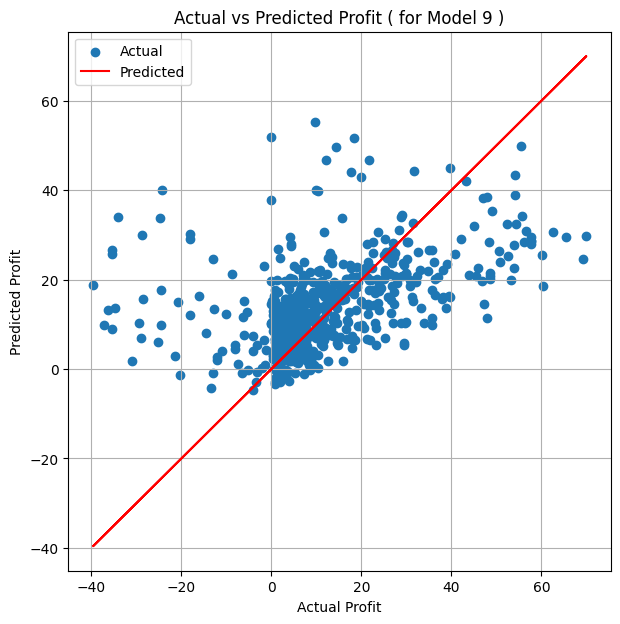

test set for model10
Performance of Model 10:

Mean Squared Error: 260.6954609813669 

Root Mean Squared Error: 16.14606642440712 

Mean Absolute Error: 10.605079954929549 

Explained Variance Score: 0.1976015174446909 

R2 Score: 0.19654966307200483 





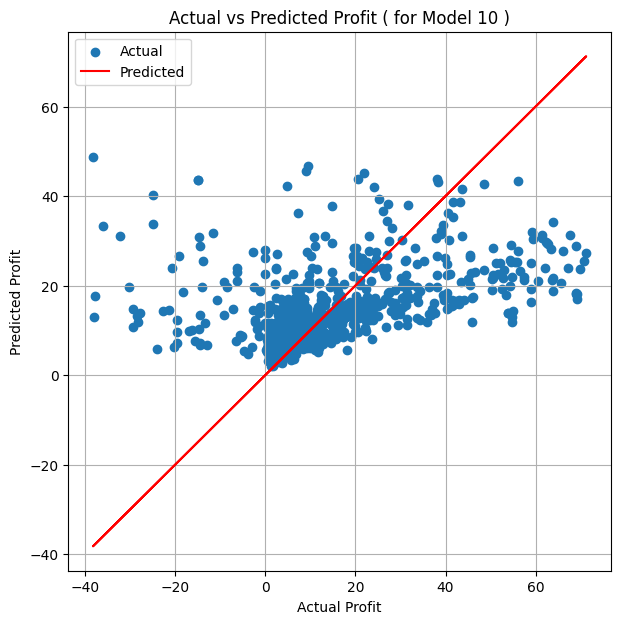



validation set for model10
Performance of Model 10:

Mean Squared Error: 262.1709517141776 

Root Mean Squared Error: 16.191693911205757 

Mean Absolute Error: 10.397720568148866 

Explained Variance Score: 0.048574637309833246 

R2 Score: 0.026530175157749913 





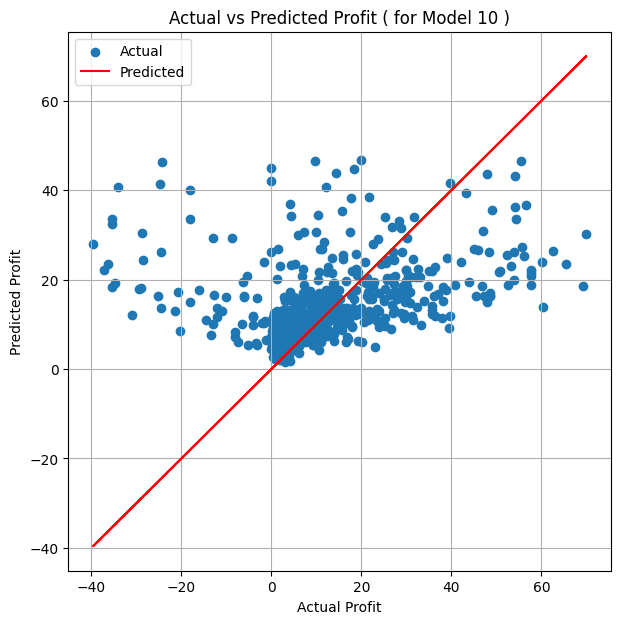

In [59]:
j=1
for i,k in zip([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10],
               [pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,pred10]):
  print(f'test set for model{j}')
  print(f"Performance of Model {j}:\n")
  print("Mean Squared Error:", mean_squared_error(n_test, i),"\n")
  print("Root Mean Squared Error:", math.sqrt(mean_squared_error(n_test, i)),"\n")
  print("Mean Absolute Error:", mean_absolute_error(n_test, i),"\n")
  print("Explained Variance Score:", explained_variance_score(n_test, i),"\n")
  print("R2 Score:", r2_score(n_test, i),"\n")
  print("\n")
  plt.figure(figsize=(7,7))
  plt.scatter(n_test,i)
  plt.plot(n_test,n_test,'r')
  plt.xlabel("Actual Profit")
  plt.ylabel(f"Predicted Profit")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Profit ( for Model {j} )")
  plt.grid(True)
  plt.show()
  print("\n")
  print(f'validation set for model{j}')
  print(f"Performance of Model {j}:\n")
  print("Mean Squared Error:", mean_squared_error(n_val, k),"\n")
  print("Root Mean Squared Error:", math.sqrt(mean_squared_error(n_val, k)),"\n")
  print("Mean Absolute Error:", mean_absolute_error(n_val, k),"\n")
  print("Explained Variance Score:", explained_variance_score(n_val, k),"\n")
  print("R2 Score:", r2_score(n_val, k),"\n")
  print("\n")
  plt.figure(figsize=(7,7))
  plt.scatter(n_val,k)
  plt.plot(n_val,n_val,'r')
  plt.xlabel("Actual Profit")
  plt.ylabel(f"Predicted Profit")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Profit ( for Model {j} )")
  plt.grid(True)
  plt.show()
  j+=1

Mean Squared Error: 159.6307640467292
Root Mean Squared Error: 12.634506877861487
Mean Absolute Error: 7.92052359180585
Explained Variance Score: 0.5080354585572908
R2 Score: 0.5080259906535739




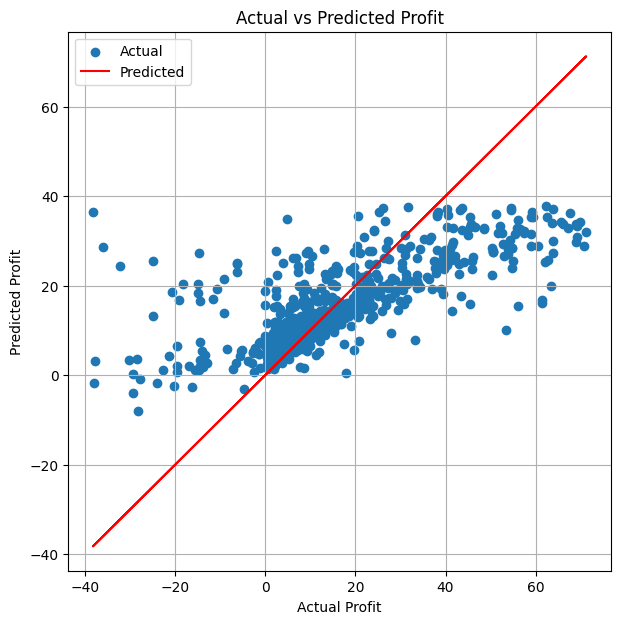

In [60]:
pred_final = np.mean([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10], axis=0)
print("Mean Squared Error:", mean_squared_error(n_test, pred_final))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(n_test, pred_final)))
print("Mean Absolute Error:", mean_absolute_error(n_test, pred_final))
print("Explained Variance Score:", explained_variance_score(n_test, pred_final))
print("R2 Score:", r2_score(n_test, pred_final))
print('\n')
plt.figure(figsize=(7,7))
plt.scatter(n_test,pred_final)
plt.plot(n_test,n_test,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Profit")
plt.grid(True)
plt.show()

Mean Squared Error: 159.00572598219088
Root Mean Squared Error: 12.609747260837185
Mean Absolute Error: 7.766765570110917
Explained Variance Score: 0.417624198673738
R2 Score: 0.4095941018303606




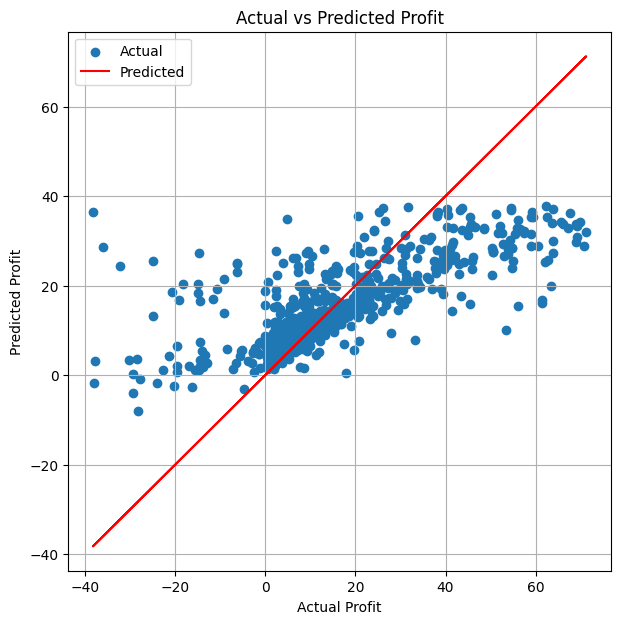

In [61]:
pred_final1 = np.mean([pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,pred10], axis=0)
print("Mean Squared Error:", mean_squared_error(n_val, pred_final1))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(n_val, pred_final1)))
print("Mean Absolute Error:", mean_absolute_error(n_val, pred_final1))
print("Explained Variance Score:", explained_variance_score(n_val, pred_final1))
print("R2 Score:", r2_score(n_val, pred_final1))
print('\n')
plt.figure(figsize=(7,7))
plt.scatter(n_test,pred_final)
plt.plot(n_test,n_test,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Profit")
plt.grid(True)
plt.show()